In [17]:
# load data
%pylab
%matplotlib inline
import pandas as pd
from google.colab import files
uploaded = files.upload()

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Saving University statistics - Cleaned Data.csv to University statistics - Cleaned Data (1).csv


In [32]:
import io
my_data = pd.read_csv(io.BytesIO(uploaded['University statistics - Cleaned Data.csv']),
                    header=0, index_col='School')
# Rows with Overseas Chinese student number --> Country total + uni specifics
relevant = my_data[my_data['Overseas Chinese student number'].notnull()].drop(columns=['System', 'Date', 'Total student number'])

chinese = relevant[['Country', 'Overseas Chinese student number', 'Domestic Chinese student number']].copy()
chinese['Overseas Chinese student number'] = chinese['Overseas Chinese student number'].astype(int)
chinese['Domestic Chinese student number'] = chinese['Domestic Chinese student number'].astype(int)
chinese.head()

,Country,Overseas Chinese student number,Domestic Chinese student number
School,,,
US Total,US,282276,309000
Stanford,US,1255,190
MIT,US,839,130
Yale,US,799,150
NYU,US,5632,530


In [0]:
num_of_country = 4

# sorted by overseas chinese
overseas_s = chinese.sort_values(by='Overseas Chinese student number', ascending=False)

# separate country total from uni
country_o_s = overseas_s.iloc[:num_of_country]
uni_o_s = overseas_s.iloc[num_of_country:]

# sorted by domestic chinese
domestic_s = chinese.sort_values(by='Domestic Chinese student number', ascending=False)

# separate country total from uni
country_d_s = domestic_s.iloc[:num_of_country]
uni_d_s = domestic_s.iloc[num_of_country:]

In [0]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
# from wide format to long format
long_country = pd.melt(country_o_s.reset_index(), id_vars=['School'], value_vars=['Overseas Chinese student number', 'Domestic Chinese student number']).sort_values(['variable','value'], ascending=False)
long_uni = pd.melt(uni_o_s.reset_index(), id_vars=['School'], value_vars=['Overseas Chinese student number', 'Domestic Chinese student number']).sort_values(['variable','value'], ascending=False)
long_country

,School,variable,value
0,US Total,Overseas Chinese student number,282276
1,Australia Total,Overseas Chinese student number,158319
2,UK Total,Overseas Chinese student number,120385
3,Canada Total,Overseas Chinese student number,74260
4,US Total,Domestic Chinese student number,309000
5,Australia Total,Domestic Chinese student number,64000
7,Canada Total,Domestic Chinese student number,50800
6,UK Total,Domestic Chinese student number,13300


# Total Chinese student number - by country

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

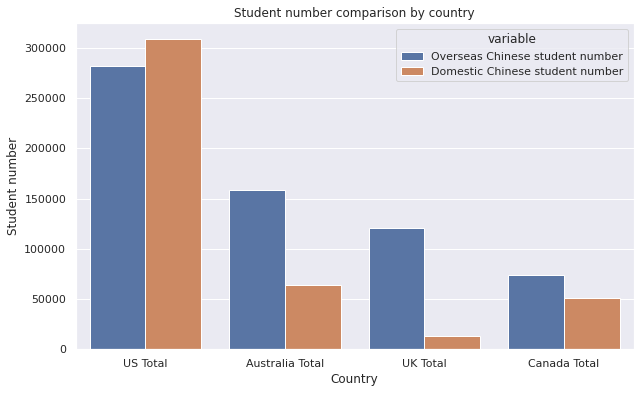

In [36]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Student number comparison by country")

g = sns.barplot(x='School', y='value', hue='variable', data=long_country)

plt.ylabel("Student number")
plt.xlabel("Country")
plt.xticks(rotation=0)

# Overseas Chinese student number - by university



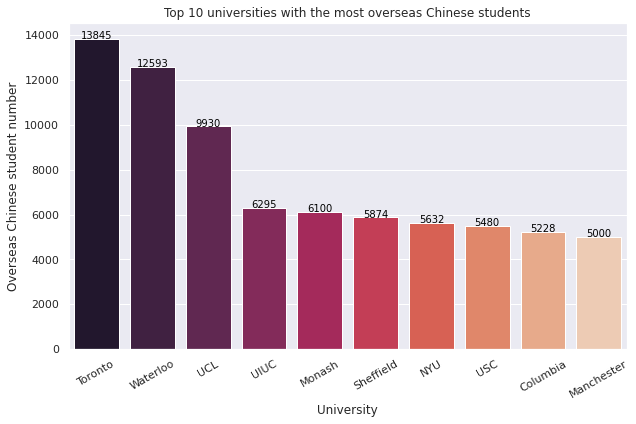

In [37]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Top 10 universities with the most overseas Chinese students")

# Bar chart showing top 10 universities with the most overseas Chinese students
x=uni_o_s.index[:10]
y=uni_o_s['Overseas Chinese student number'][:10]
g = sns.barplot(x=x, y=y, palette="rocket")

plt.ylabel("Overseas Chinese student number")
plt.xlabel("University")
plt.xticks(rotation=30)

for i, v in enumerate(y):
    g.text(i, v+1, str(v), color='black', ha='center')

Text(0, 0.5, 'Overseas Chinese student number')

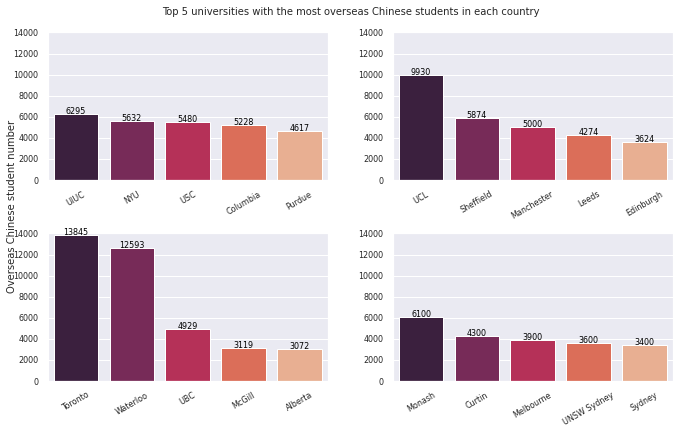

In [38]:
f, axes = plt.subplots(2, 2, figsize=(10,6))
f.tight_layout(pad=3.0)

plt.suptitle("Top 5 universities with the most overseas Chinese students in each country", fontsize=10)

country_list = ['US', 'UK', 'Canada', 'Australia']

for id, country in enumerate(country_list):

  temp_uni_o_s = uni_o_s[uni_o_s['Country']==country]

  x=temp_uni_o_s.index[:5]
  y=temp_uni_o_s['Overseas Chinese student number'][:5]
  g = sns.barplot(x=x, y=y, palette="rocket", ax=axes[id // 2, id % 2])

  axes[id // 2, id % 2].set_xticklabels(labels=x, rotation=30)
  axes[id // 2, id % 2].set(ylim=(0, 14000))
  axes[id // 2, id % 2].tick_params(labelsize=8)
  axes[id // 2, id % 2].set_ylabel('')    
  axes[id // 2, id % 2].set_xlabel('')


  for i, v in enumerate(y):
      g.text(i, v+1, str(v), color='black', ha='center', fontsize=8)

# To add a common y label
sns.set_style('white')
f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Overseas Chinese student number", fontsize=10)

Text(0.5, 1.0, 'Overseas categorical scatter plot by country')

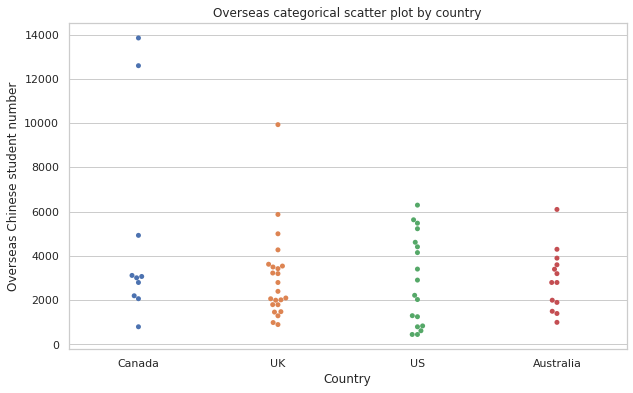

In [39]:
# Categorical scatter plot
sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})
sns.swarmplot(x=uni_o_s['Country'],
              y=uni_o_s['Overseas Chinese student number'])
plt.title('Overseas categorical scatter plot by country')

# Domestic Chinese student number - by university

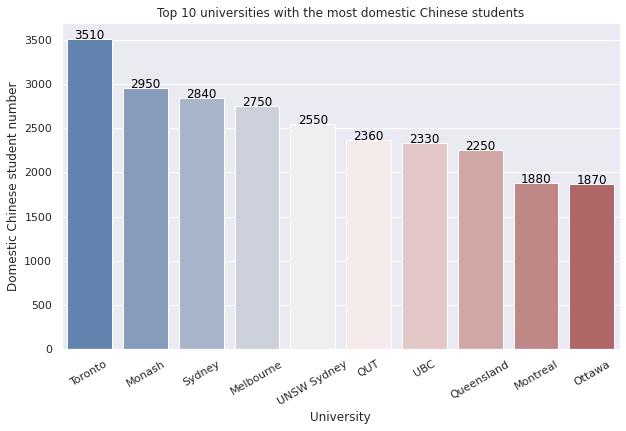

In [40]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Top 10 universities with the most domestic Chinese students")

# Bar chart showing top 10 universities with the most domestic Chinese students
x=uni_d_s.index[:10]
y=uni_d_s['Domestic Chinese student number'][:10]
g = sns.barplot(x=x, y=y, palette="vlag")

plt.ylabel("Domestic Chinese student number")
plt.xlabel("University")
plt.xticks(rotation=30)

for i, v in enumerate(y):
    g.text(i, v+1, str(v), color='black', ha='center')

Text(0, 0.5, 'Domestic Chinese student number')

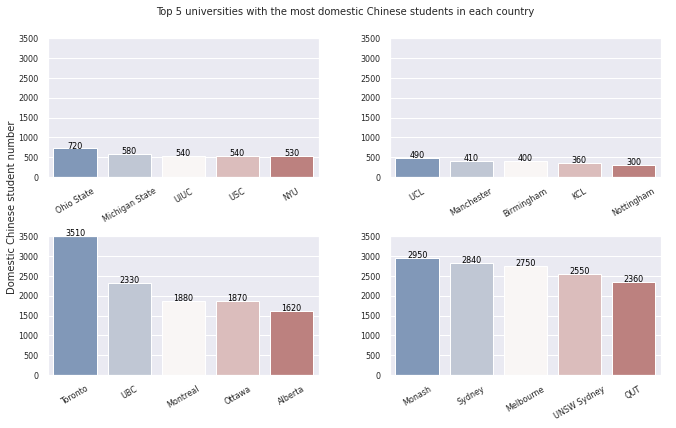

In [41]:
f, axes = plt.subplots(2, 2, figsize=(10,6))
f.tight_layout(pad=3.0)

plt.suptitle("Top 5 universities with the most domestic Chinese students in each country", fontsize=10)

country_list = ['US', 'UK', 'Canada', 'Australia']

for id, country in enumerate(country_list):

  temp_uni_d_s = uni_d_s[uni_d_s['Country']==country]

  x=temp_uni_d_s.index[:5]
  y=temp_uni_d_s['Domestic Chinese student number'][:5]
  g = sns.barplot(x=x, y=y, palette="vlag", ax=axes[id // 2, id % 2])

  axes[id // 2, id % 2].set_xticklabels(labels=x, rotation=30)
  axes[id // 2, id % 2].set(ylim=(0, 3500))
  axes[id // 2, id % 2].tick_params(labelsize=8)
  axes[id // 2, id % 2].set_ylabel('')    
  axes[id // 2, id % 2].set_xlabel('')


  for i, v in enumerate(y):
      g.text(i, v+1, str(v), color='black', ha='center', fontsize=8)

# To add a common y label
sns.set_style('white')
f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Domestic Chinese student number", fontsize=10)

Text(0.5, 1.0, 'Domestic categorical scatter plot by country')

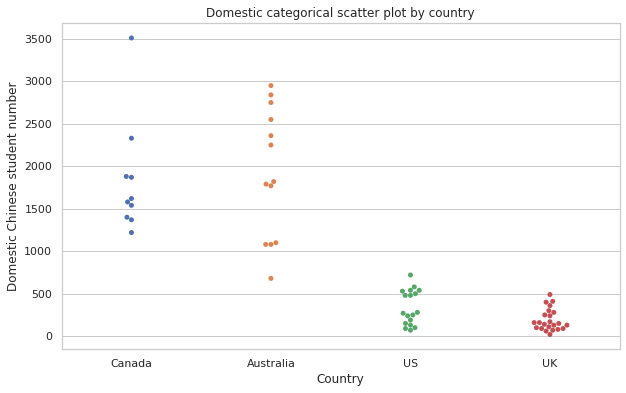

In [42]:
# Categorical scatter plot
sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})
sns.swarmplot(x=uni_d_s['Country'],
              y=uni_d_s['Domestic Chinese student number'])
plt.title('Domestic categorical scatter plot by country')

# University Ranking

In [47]:
ranking = relevant.drop(columns=['Overseas Chinese student number', 'Domestic Chinese student number']).copy()

cols = ranking.columns.drop('Country')
ranking[cols] = ranking[cols].apply(pd.to_numeric, errors='coerce')
ranking.head()

,Country,2020 QS Ranking,2020 QS Score,2020 THE Ranking,2020 THE Score,2019 ARWU Ranking,2019 ARWU Score
School,,,,,,,
US Total,US,NaN,NaN,NaN,NaN,NaN,NaN
Stanford,US,2.0,98.4,4.0,94.3,2.0,75.1
MIT,US,1.0,100.0,5.0,93.6,4.0,69.0
Yale,US,17.0,87.7,8.0,91.7,11.0,50.8
NYU,US,39.0,78.8,29.0,81.1,30.0,38.1


# Unstudied overseas Chinese students


Assume students cannot enroll in more than one university simultaneously.

We look at how many of them are not included in this study.

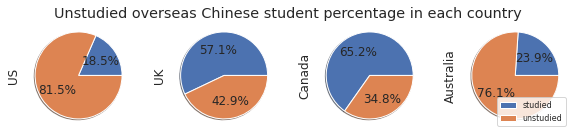

In [43]:
country_list = ['US', 'UK', 'Canada', 'Australia']

df = pd.DataFrame()

for id, country in enumerate(country_list):

  temp_uni_o_s = uni_o_s[uni_o_s['Country']==country]

  studied = temp_uni_o_s['Overseas Chinese student number'].sum()
  unstudied = country_o_s[country_o_s['Country']==country]['Overseas Chinese student number'].sum() - studied

  temp = pd.DataFrame({country: [studied, unstudied]},
                  index=['studied', 'unstudied'])
  
  df = pd.concat([df, temp], axis=1)

g = df.plot.pie(subplots=True, labels=None, legend=None,
                figsize=(10, 2), shadow=True, autopct='%1.1f%%',
                title="Unstudied overseas Chinese student percentage in each country")

plt.legend(df.index, loc='lower right', fontsize=8)